<a href="https://colab.research.google.com/github/skflwright/Python_Projects_Data_201/blob/main/Data_Analytics_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python for Data Analytics: Project 2 Assignment**#
Kimberly Wright, Spring 2022

The goal of this project is to analyze NYPD arrest data. As part of the assignment, we were asked to pick any zip code/neighborhood in this dataset as an initial comparison point and to pick a feature/measure/column and compare the above entity to any other different entity.

The analysis should include data cleaning, descriptive statistics and data visualization. 



##**Data Upload & Initial Exploration**##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_json("https://data.cityofnewyork.us/resource/uip8-fykc.json")
df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,238552639,2022-01-03T00:00:00.000,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,...,1015028,185895,40.676863,-73.889037,"{'type': 'Point', 'coordinates': [-73.889037, ...",45.0,2.0,37.0,47.0,17214.0
1,238682242,2022-01-05T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,...,1017119,183909,40.671404,-73.881509,"{'type': 'Point', 'coordinates': [-73.881509, ...",45.0,2.0,25.0,47.0,17215.0
2,238723993,2022-01-06T00:00:00.000,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,...,1003509,185018,40.674496,-73.930571,"{'type': 'Point', 'coordinates': [-73.93057132...",16.0,2.0,49.0,49.0,17615.0
3,238821533,2022-01-08T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,...,1046367,186986,40.679701,-73.776047,"{'type': 'Point', 'coordinates': [-73.77604735...",41.0,3.0,46.0,71.0,24669.0
4,239029586,2022-01-12T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,...,1046367,186986,40.679701,-73.776047,"{'type': 'Point', 'coordinates': [-73.77604735...",41.0,3.0,46.0,71.0,24669.0


In [3]:
df.shape # There are 1000 rows of arrest data and 24 columns


(1000, 24)

In [4]:
df.info() #Look at the information and data types contained in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   arrest_key                   1000 non-null   int64  
 1   arrest_date                  1000 non-null   object 
 2   pd_cd                        985 non-null    float64
 3   pd_desc                      1000 non-null   object 
 4   ky_cd                        979 non-null    float64
 5   ofns_desc                    1000 non-null   object 
 6   law_code                     1000 non-null   object 
 7   law_cat_cd                   990 non-null    object 
 8   arrest_boro                  1000 non-null   object 
 9   arrest_precinct              1000 non-null   int64  
 10  jurisdiction_code            1000 non-null   int64  
 11  age_group                    1000 non-null   object 
 12  perp_sex                     1000 non-null   object 
 13  perp_race          

**Data Sources**
The data used for this analysis comes from:

1) NYC Open Data's NYPD Arrest Data Year to Date. (The data is updated quarterly, with the last update on 7/15/2022).  The data can be found at: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc


Null values appearing frequently in certain fields may be attributed to changes on official department forms where data was previously not collected. Null values may also appear in instances where information was not available or unknown at the time of the report and should be considered as either "Unknown/Not Available/Not Reported"

Arrests which involve multiple charges are classified according to the top charge.

Note: Many other arrests that were not able to be geocoded (for ex, due to an invalid address) have been located as occurring at the police station house within the precinct of occurrence. ** This should be cleaned/analyzed before conducting any kind of predictive analysis on crime location by address.

Arrests occurring on a moving train on any of the transit systems are geo-coded as occurring at the train's next stop. 

All arrests occurring within the Department of Correction have been geo-coded as occurring on Riker's Island (!... wonder what this means for the stats at Rikers?)

Only valid arrests are included in this data. Arrests that were voided when further investigation reveals a person did not commit the offense or it is determined no offense was committted are excluded from this data set. 

2) John Keefe's dataset of NYC Census population by precinct. https://johnkeefe.net/nyc-police-precinct-and-census-data.  This data includes a summary of the population based on 2020 Census data and the land-based borders (to account for shoreline boundaries that go into the water...). 

**Data Dictionary**

The data dictionary outlining the definition of terms used in the column information can be found at: (more info here: https://data.cityofnewyork.us/api/views/uip8-fykc/files/62a746df-66ca-4603-aae4-46c02bac2972?download=true&filename=NYPD_Arrest_Incident_Level_Data_Footnotes.pdf)

Important terms for the purpose of this analysis include:
Arrest Key =     Randomly generated persistent ID for each arrest
Arrest Date =    exact date of arrest for the reported event
PD_Desc =        Description of the internal classification of PD_CD
OFNS_DESC =      Offense description
Arrest Borough = Borough where arrest occurred (Manhattan (M), Bronx (B),                Staten Island (S), Brooklyn (K) and Queens (Q)
Age_Group =      Perpetrator's age within a category 
Perp_Sex=        Perpetrator's sex description
Perp_Race =      Perpetrator's race description


In [5]:
df.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

#**Data Cleaning**#

To clean the data, I checked for null and non-standard missing values, dropped unnecessary columns, renamed columns for reader clarity and organized the data for exploration. 

In [6]:
#Drop unnecessary columns from dataset for analysis
drop_cols=['law_code',
           'law_cat_cd',
           'x_coord_cd',
           'y_coord_cd',
           ':@computed_region_f5dn_yrer',
           ':@computed_region_yeji_bk3q',
           ':@computed_region_92fq_4b7q',
           ':@computed_region_sbqj_enih',
           ':@computed_region_efsh_h5xi']
df.drop(drop_cols, inplace=True, axis=1)


In [7]:
df.columns #check that columns are gone


Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'arrest_boro', 'arrest_precinct', 'jurisdiction_code', 'age_group',
       'perp_sex', 'perp_race', 'latitude', 'longitude', 'geocoded_column'],
      dtype='object')

In [8]:
df.dtypes #check data types

arrest_key             int64
arrest_date           object
pd_cd                float64
pd_desc               object
ky_cd                float64
ofns_desc             object
arrest_boro           object
arrest_precinct        int64
jurisdiction_code      int64
age_group             object
perp_sex              object
perp_race             object
latitude             float64
longitude            float64
geocoded_column       object
dtype: object

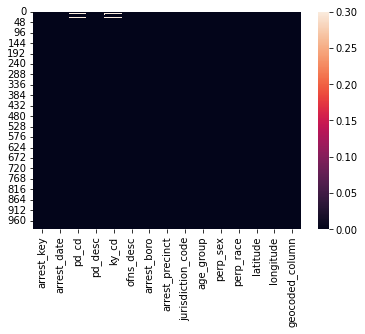

In [9]:
sns.heatmap(df.isnull(),cbar=True,vmin=0,vmax=.3) #there is missing data in the crime coding & description columns.

In [10]:
df.isnull().sum() # Getting more granular, there are 15 internal classification code and 21 internal classification 
#descriptions missing.  As this information is only relevant to NYPD, the rows will remain in the dataset. 

arrest_key            0
arrest_date           0
pd_cd                15
pd_desc               0
ky_cd                21
ofns_desc             0
arrest_boro           0
arrest_precinct       0
jurisdiction_code     0
age_group             0
perp_sex              0
perp_race             0
latitude              0
longitude             0
geocoded_column       0
dtype: int64

In [11]:
df=df[["arrest_key","arrest_date","ofns_desc","arrest_boro","arrest_precinct","age_group","perp_sex","perp_race","latitude","longitude"]]
df.head()

,arrest_key,arrest_date,ofns_desc,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,latitude,longitude
0,238552639,2022-01-03T00:00:00.000,CRIMINAL TRESPASS,K,75,18-24,M,BLACK,40.676863,-73.889037
1,238682242,2022-01-05T00:00:00.000,ROBBERY,K,75,25-44,M,BLACK,40.671404,-73.881509
2,238723993,2022-01-06T00:00:00.000,RAPE,K,77,25-44,M,WHITE,40.674496,-73.930571
3,238821533,2022-01-08T00:00:00.000,(null),Q,113,45-64,M,WHITE HISPANIC,40.679701,-73.776047
4,239029586,2022-01-12T00:00:00.000,(null),Q,113,25-44,M,WHITE HISPANIC,40.679701,-73.776047


In [12]:
df=df[(df["ofns_desc"].str.contains("(null)")==False) & (df["ofns_desc"].str.contains("NaN")==False)]# get rid of Nan and (null) entries
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,arrest_key,arrest_date,ofns_desc,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,latitude,longitude
0,238552639,2022-01-03T00:00:00.000,CRIMINAL TRESPASS,K,75,18-24,M,BLACK,40.676863,-73.889037
1,238682242,2022-01-05T00:00:00.000,ROBBERY,K,75,25-44,M,BLACK,40.671404,-73.881509
2,238723993,2022-01-06T00:00:00.000,RAPE,K,77,25-44,M,WHITE,40.674496,-73.930571
5,239104920,2022-01-13T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,77,45-64,M,BLACK,40.674593,-73.930572
7,239623520,2022-01-24T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,60,45-64,M,WHITE,40.577258,-73.976436


In [13]:
df.shape #getting rid of NaN and (null)entries from the Offense Description column removed 21 rows fromt the dataset

(979, 10)

In [14]:
df=df[(df["arrest_date"].str.contains("(null)")==False) & (df["arrest_date"].str.contains("NaN")==False)]# get rid of Nan and (null) entries
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,arrest_key,arrest_date,ofns_desc,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,latitude,longitude
0,238552639,2022-01-03T00:00:00.000,CRIMINAL TRESPASS,K,75,18-24,M,BLACK,40.676863,-73.889037
1,238682242,2022-01-05T00:00:00.000,ROBBERY,K,75,25-44,M,BLACK,40.671404,-73.881509
2,238723993,2022-01-06T00:00:00.000,RAPE,K,77,25-44,M,WHITE,40.674496,-73.930571
5,239104920,2022-01-13T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,77,45-64,M,BLACK,40.674593,-73.930572
7,239623520,2022-01-24T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,60,45-64,M,WHITE,40.577258,-73.976436


In [15]:
df.shape

(979, 10)

In [16]:
#rename columns 
df.rename(columns={'ofns_desc':'offense','arrest_precinct':'precinct'},inplace=True)
df.head()

,arrest_key,arrest_date,offense,arrest_boro,precinct,age_group,perp_sex,perp_race,latitude,longitude
0,238552639,2022-01-03T00:00:00.000,CRIMINAL TRESPASS,K,75,18-24,M,BLACK,40.676863,-73.889037
1,238682242,2022-01-05T00:00:00.000,ROBBERY,K,75,25-44,M,BLACK,40.671404,-73.881509
2,238723993,2022-01-06T00:00:00.000,RAPE,K,77,25-44,M,WHITE,40.674496,-73.930571
5,239104920,2022-01-13T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,77,45-64,M,BLACK,40.674593,-73.930572
7,239623520,2022-01-24T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,60,45-64,M,WHITE,40.577258,-73.976436


In [17]:
#rename rows in arrest_boro to match the name of the borough. I'll first create a dictionary of the boroughs to map 
#the letter keys to...
borough={
    'B':'Bronx',
    'S':'Staten Island',
    'K':'Brooklyn',
    'M':'Manhattan',
    'Q':'Queens'}


In [18]:
df['borough'] = df['arrest_boro'].map(borough)
df.head()

,arrest_key,arrest_date,offense,arrest_boro,precinct,age_group,perp_sex,perp_race,latitude,longitude,borough
0,238552639,2022-01-03T00:00:00.000,CRIMINAL TRESPASS,K,75,18-24,M,BLACK,40.676863,-73.889037,Brooklyn
1,238682242,2022-01-05T00:00:00.000,ROBBERY,K,75,25-44,M,BLACK,40.671404,-73.881509,Brooklyn
2,238723993,2022-01-06T00:00:00.000,RAPE,K,77,25-44,M,WHITE,40.674496,-73.930571,Brooklyn
5,239104920,2022-01-13T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,77,45-64,M,BLACK,40.674593,-73.930572,Brooklyn
7,239623520,2022-01-24T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,60,45-64,M,WHITE,40.577258,-73.976436,Brooklyn


##**Data Exploration**##

The greatest number of arrests across all boroughs are for  assault, followed by petit larceny and felony assault. 

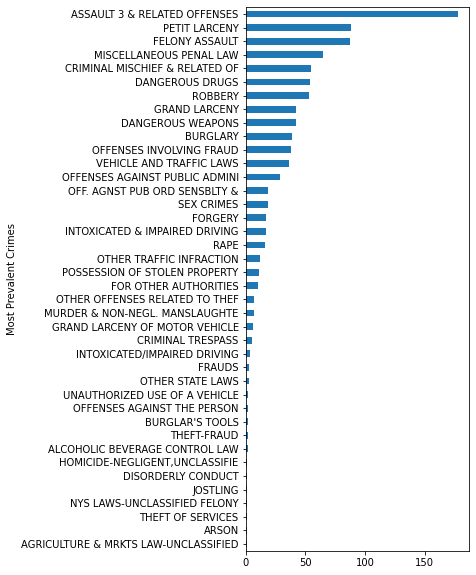

In [19]:
df.groupby(['offense'])['arrest_date'].count().sort_values(ascending=True).plot(kind='barh',figsize=(4,10),xlabel='Most Prevalent Crimes') 

In [20]:
#groupby borough to count of arrests and count to find the boro with the greatest number of arrests
df.groupby(["borough"])["offense"].count() #Brooklyn has the greatest number of arrests


borough
Bronx            196
Brooklyn         303
Manhattan        215
Queens           208
Staten Island     57
Name: offense, dtype: int64

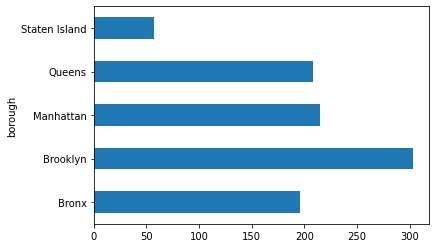

In [21]:
df.groupby(["borough"])["offense"].count().plot(kind='barh')

Brooklyn has the largest number of arrests.  Given that Brooklyn also has the largest population in NYC, it makes sense that it has the highest number of arrests (303). We are interested in understanding more about which neighborhoods have the highest crime rates and the lowest crime rates. Since the objective is to compare one neighborhood to another, I'd like to better understand the population sizes for each precinct to determine if the relative number of arrests is significant. This data was not included in the NYPD figures. Luckily, John Keefe, data weather analyst at NYT has mapped out the 2020 census population to each NYC precinct (see https://johnkeefe.net/nyc-police-precinct-and-census-data). Column P1_001N, according to his notes, should be the total population per precinct. I'll use this to see if I can determine the highest relative number of arrests per precinct. 

In [22]:
df_precinct_pop = pd.read_csv("https://raw.githubusercontent.com/jkeefe/census-by-precincts/master/data/nyc/nyc_precinct_2020pop.csv")
df_precinct_pop.head()

,precinct,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,...,P2_064N,P2_065N,P2_066N,P2_067N,P2_068N,P2_069N,P2_070N,P2_071N,P2_072N,P2_073N
0,1,84799,76937,57501,2655,96,14624,55,2006,7862,...,1,0,0,0,0,0,0,0,0,0
1,5,50598,47663,13363,3556,109,27507,69,3059,2935,...,0,1,0,1,0,0,0,0,0,0
2,6,64643,59481,50320,1782,72,5635,34,1638,5162,...,0,0,0,0,0,0,0,0,0,0
3,7,57985,51746,18416,6934,396,17779,46,8175,6239,...,0,0,0,0,0,0,0,0,0,0
4,9,75951,68112,41843,6610,480,11322,84,7773,7839,...,0,3,3,0,0,0,0,0,0,0


In [23]:
df_precinct_pop.columns

Index(['precinct', 'P1_001N', 'P1_002N', 'P1_003N', 'P1_004N', 'P1_005N',
       'P1_006N', 'P1_007N', 'P1_008N', 'P1_009N',
       ...
       'P2_064N', 'P2_065N', 'P2_066N', 'P2_067N', 'P2_068N', 'P2_069N',
       'P2_070N', 'P2_071N', 'P2_072N', 'P2_073N'],
      dtype='object', length=145)

In [24]:
df_precinct_pop.shape # this confirms that there are 77 precincts in NYC ... note that precint 1 = 0 so should 
#likely set precinct as the index.

(77, 145)

In [25]:
df_precinct_pop[['precinct','P1_001N']]
precinct_pop=df_precinct_pop[['precinct','P1_001N']]
precinct_pop.head() #here we subset just the total population of each precinct. 
#Next I'll merge this dataframe with the arrest data frame on the 'precinct' column so we can identify the 
#precincts with the greatest number of arrests.

,precinct,P1_001N
0,1,84799
1,5,50598
2,6,64643
3,7,57985
4,9,75951


In [26]:
precinct_pop.shape

(77, 2)

In [27]:
pd.merge(df,precinct_pop,on='precinct', how='left')
df = pd.merge(df,precinct_pop,on='precinct', how='left')
df.head()


,arrest_key,arrest_date,offense,arrest_boro,precinct,age_group,perp_sex,perp_race,latitude,longitude,borough,P1_001N
0,238552639,2022-01-03T00:00:00.000,CRIMINAL TRESPASS,K,75,18-24,M,BLACK,40.676863,-73.889037,Brooklyn,200994
1,238682242,2022-01-05T00:00:00.000,ROBBERY,K,75,25-44,M,BLACK,40.671404,-73.881509,Brooklyn,200994
2,238723993,2022-01-06T00:00:00.000,RAPE,K,77,25-44,M,WHITE,40.674496,-73.930571,Brooklyn,101267
3,239104920,2022-01-13T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,77,45-64,M,BLACK,40.674593,-73.930572,Brooklyn,101267
4,239623520,2022-01-24T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,60,45-64,M,WHITE,40.577258,-73.976436,Brooklyn,109024


In [28]:
df.rename(columns={'P1_001N':'precinct_population'}, inplace = True) 
df.head()

,arrest_key,arrest_date,offense,arrest_boro,precinct,age_group,perp_sex,perp_race,latitude,longitude,borough,precinct_population
0,238552639,2022-01-03T00:00:00.000,CRIMINAL TRESPASS,K,75,18-24,M,BLACK,40.676863,-73.889037,Brooklyn,200994
1,238682242,2022-01-05T00:00:00.000,ROBBERY,K,75,25-44,M,BLACK,40.671404,-73.881509,Brooklyn,200994
2,238723993,2022-01-06T00:00:00.000,RAPE,K,77,25-44,M,WHITE,40.674496,-73.930571,Brooklyn,101267
3,239104920,2022-01-13T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,77,45-64,M,BLACK,40.674593,-73.930572,Brooklyn,101267
4,239623520,2022-01-24T00:00:00.000,ASSAULT 3 & RELATED OFFENSES,K,60,45-64,M,WHITE,40.577258,-73.976436,Brooklyn,109024


In [29]:
df['arrest_date'].describe() #In looking at the unique values, I can see that the arrests cover the first six months 
# of 2022

count                         979
unique                        110
top       2022-01-19T00:00:00.000
freq                           32
Name: arrest_date, dtype: object

In [30]:
df.info()#here I'm checking to see what the data types are and if there are any non-nulls now that I added column.
#there are not, but the date_time is listed as an object. If I want to do any descriptive stats on when crimes occur, 
#I'll need to change this. 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 978
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arrest_key           979 non-null    int64  
 1   arrest_date          979 non-null    object 
 2   offense              979 non-null    object 
 3   arrest_boro          979 non-null    object 
 4   precinct             979 non-null    int64  
 5   age_group            979 non-null    object 
 6   perp_sex             979 non-null    object 
 7   perp_race            979 non-null    object 
 8   latitude             979 non-null    float64
 9   longitude            979 non-null    float64
 10  borough              979 non-null    object 
 11  precinct_population  979 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 99.4+ KB


In [31]:
df['arrest_date']=df['arrest_date'].astype('datetime64[ns]')
df['age_group']=df['age_group'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 978
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   arrest_key           979 non-null    int64         
 1   arrest_date          979 non-null    datetime64[ns]
 2   offense              979 non-null    object        
 3   arrest_boro          979 non-null    object        
 4   precinct             979 non-null    int64         
 5   age_group            979 non-null    string        
 6   perp_sex             979 non-null    object        
 7   perp_race            979 non-null    object        
 8   latitude             979 non-null    float64       
 9   longitude            979 non-null    float64       
 10  borough              979 non-null    object        
 11  precinct_population  979 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5), string(1)
memory usage: 99.4+ KB


From the scatter plot of offenses over time, we see the greatest concentration of crime across boroughs in pety larceny, assault, traffic violations, drugs and assault. The research question I'll set out to answer is: 
#**Research Question:**#
##What are the top 5 high crime and top 5 low crime neighborhoods in terms of arrests? Of these, can we see any significant differences in any of the features? ##

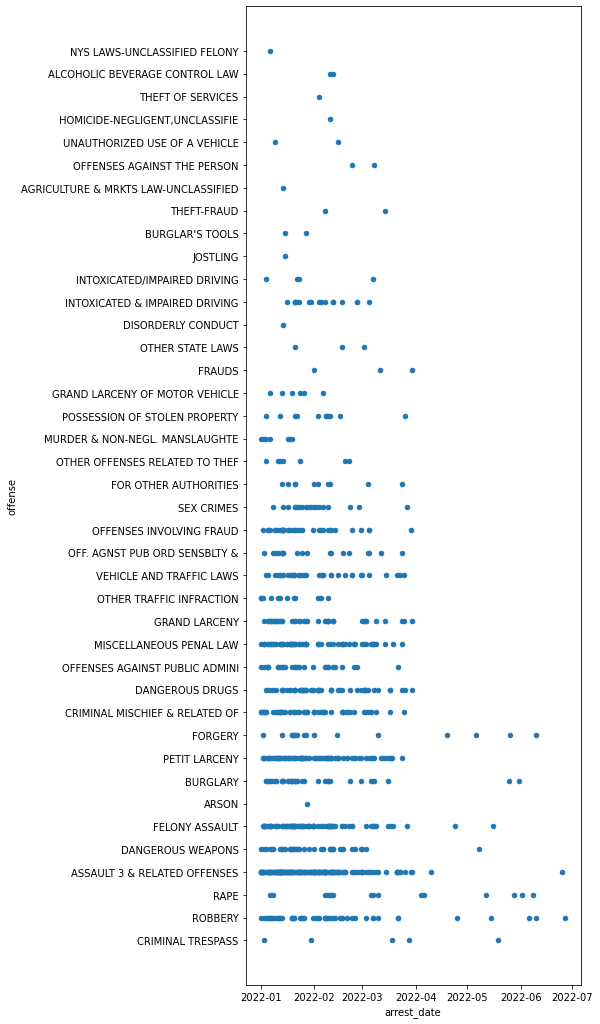

In [32]:
df.plot(kind='scatter',x='arrest_date',y='offense',figsize=(6,18))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


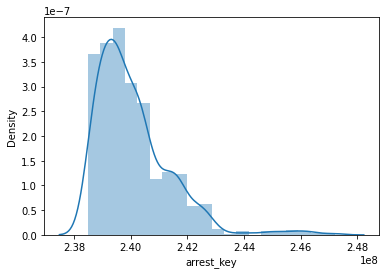

In [33]:
sns.distplot(df['arrest_key'],bins=20)# just seeing what this does. Despite reassigning date to datetime, python is not 
# letting me plot distribution but from reviewing data, it looks like it's going by number of arrests over time. 
# Need to learn more about how to visualize labels. 









Looking at the total number of arrests by precinct enables us to get a better sense of the greatest number of arrests by local neighborhood.  The precincts with the greatest number of arrests between January and June 2022 include: the 44th, 120th, 75th, 105th and 110th precincts.

The 44th precinct is located on 169th St in the Bronx, NY 10452; the 120th precinct is located in Richmond Terrace, Staten Island, NY 10301; the 75th precinct is located on Sutter Ave in Brooklyn, NY 11208; the 105th precinct in 222nd St, Queens and the 110th precinct is in Elmhurst Queens. 

The five precincts with the lowest number of arrests in the same period include: the 9th, the 10th, 94th, 111th and 112th.  The 9th precinct is located on the lower east side on 5th St. in Manhattan, 10003; the 10th precinct is located in Chelsea on 20th St in Manhattan 10011, the 94th precinct is 111th is located in Bayside Queens and the 112th precinct in Forest Hills and Rego Park. 

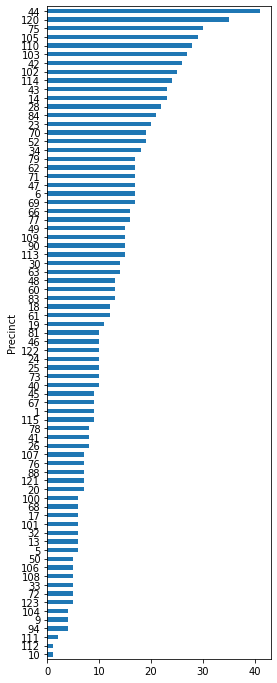

In [34]:
df.groupby(['precinct'])['arrest_date'].count().sort_values(ascending=True).plot(kind='barh',figsize=(4,12),xlabel='Precinct')


In the following analysis, I'll compare the precinct/neighborhood with the second lowest number of arrests (the 9th in the Lower east side (the lowest number of arrests, the 10th in Chelsea, does not have any data) with the precinct/neighborhood with the highest number of arrests, the 44th precinct, in the southwest portion of the Bronx covering Grand Concourse, Bronx Terminal Market, and Yankee Stadium.

I'll compare each by total arrests relative to the population and type of arrest.

**Feature Comparison Between the 9th and 44th Precincts:**

**Offense Comparison**

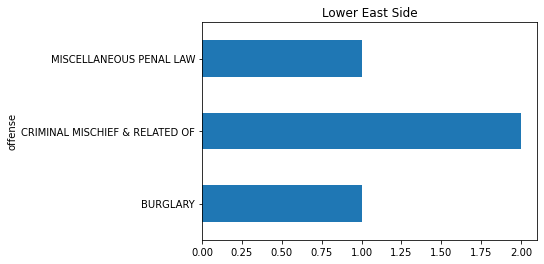

In [35]:
df[df['precinct']==9]
precinct_9 = df[df['precinct']==9]
precinct_44 = df[df['precinct']==44]
precinct_9.groupby(['offense'])['arrest_date'].count().plot(kind='barh',title='Lower East Side')


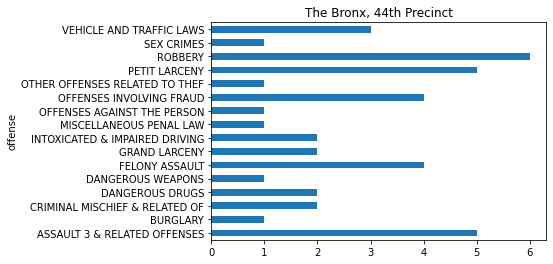

In [36]:
precinct_44.groupby(['offense'])['arrest_date'].count().plot(kind='barh',title='The Bronx, 44th Precinct')

**Arrest to Population Comparison**

In comparing the number of arrests to the total population of each precinct we see that the 44th precint population is twice the size of the lower east side population and exhibits greater variety in types of crime. 

While the number of arrests in the 44th precinct in the Bronx was ten times higher, the total numbers were insignificant when compared to the population, representing less than one percent. 

It should be noted that the data reflects actual arrests made, which means that the perpetrator was either caught in the act or someone pressed charges. As such, the data may not accurately depict the total level of crime that occurs in each area as many might go unreported or not end in arrest. 


In [37]:
#add a column to show the number of arrests relative to the population in the 9th precinct (10003):
precinct_9['arrest_date'].count() # =4 as illustrated above
precinct_9['precinct_population']


143    75951
487    75951
646    75951
658    75951
Name: precinct_population, dtype: int64

In [38]:
x= 4
y= 75951
ratio_arrests_to_pop = x/y

ratio_arrests_to_pop

5.266553435767798e-05

The total number of arrests in the 9th precinct during the first six months of 2022 was 4 (1 for burglary, 2 for criminal mischief and 1 for miscellaneous penal law). The total population in the 9th precinct is 75,951. As such, the ratio of arrests to the population is minimal. The crimes (all four of them) were committed by persons falling in the age category of 25-44 and 45-64. 

In [39]:
#the number of arrests relative to the population in the 44th precinct (10452):
precinct_44['arrest_date'].count() # = 41 as illustrated above
precinct_44['precinct_population'].head() # = 150436

20     150436
24     150436
46     150436
56     150436
133    150436
Name: precinct_population, dtype: int64

In [40]:
x= 41
y= 150436
ratio_arrests_to_pop = x/y

ratio_arrests_to_pop

0.0002725411470658619

The 44th precinct logged 41 arrests over the first six months of 2022. The greatest number of arrests involved theft (13 including burglary, robbery and petit larceny, 15 if you include grand larceny) followed by assault (9, including felony assault and assault3 & related offenses).   

The majority of offenses were committed by adults between the ages of 25-44, with 12% (5) involving young adults aged 18-24.


**Age Group Comparison**

In looking at the ages of each precinct, there was little to be gleaned from the 9th precinct arrests as there were only four, two of whom fall into the 25-44 age group and the other two into the 45-64 group.  In the 44th precinct, the greatest number of arrests were for individuals between the ages of 25-44.

In [41]:
precinct_9['age_group'].mode() #there are only four crimes so the mode does not tell us much since 2 arrests were for individuals aged 25-44 and 2 were 
#for individuals aged 45-64.

0    25-44
1    45-64
dtype: string

In [42]:
precinct_44['age_group'].mode() #the greatest number of arrests were for individuals between the ages of 25-44.

0    25-44
dtype: string

**Arrests by Sex**


The majority of arrests in both precincts involved men. (Makes one wonder since the news reported a number of female shooters ... once again illustrating that not all perpetrators are caught or counted.

In [43]:
precinct_9['perp_sex'].mode() #most 9th precinct arrests were of males.

0    M
dtype: object

In [44]:
precinct_44['perp_sex'].mode() #most 44th precinct arrests were of males

0    M
dtype: object

**Comparision of Arrests by Race**

The races of arrests made were primarily white and hispanic in the 9th precinct, located in Chelsea and primarily Black in the 44th precinct, located in the Bronx. This likely reflects the populations in each neighborhood. To determine if this is true, I would need to retrieve the Census population figures concerning race. These are available from Keefe's data but fall outside of the scope of this analysis. 

In [45]:
precinct_9['perp_race'].mode() #Of the four, there was even number of white and hispanic race arrests

0    WHITE HISPANIC
dtype: object

In [46]:
precinct_44['perp_race'].mode() #The greatest number of arrests in the Bronx 44th precinct involved the Black race.

0    BLACK
dtype: object

**Comparison of Arrest Activity**

In plotting out the crimes in both precincts,  we see that most of the arrests took place in the winter months:

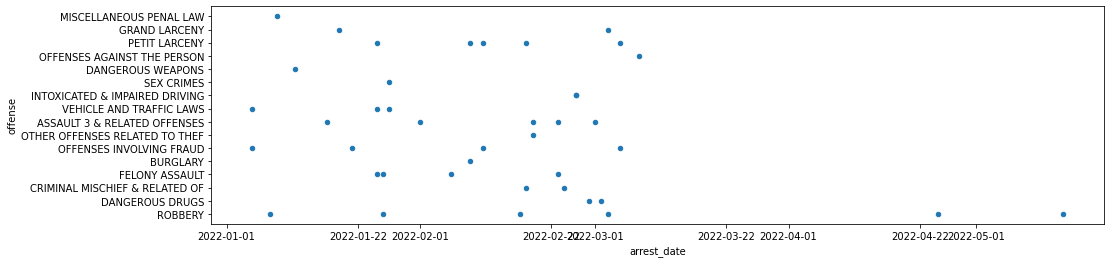

In [47]:
precinct_44.plot(kind='scatter',x='arrest_date',y='offense',figsize=(16,4))

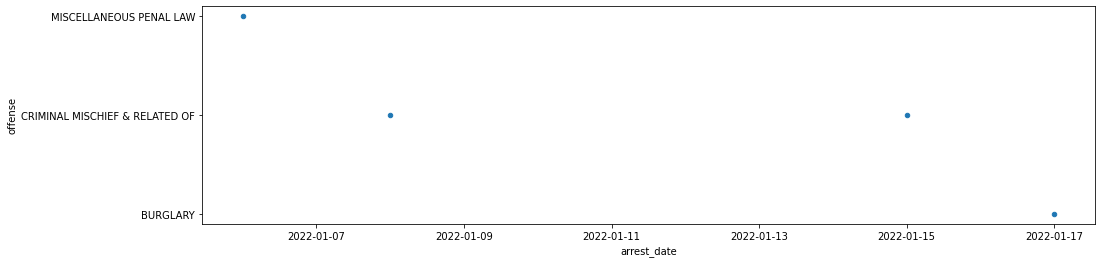

In [48]:
precinct_9.plot(kind='scatter',x='arrest_date',y='offense',figsize=(16,4))

##**Summary & Key Findings**##

The objective of this project was to analyze NYPD Arrest data for arrests made in the first six months of 2022 (the Arrests to Date available on NYC Open Data).  To determine which areas to focus on, I first looked at which borough has the greatest number of arrests. This is Brooklyn but Brooklyn also has the greatest concentration of people.  I therefore looked at the crimes by precinct to determine which precincts had the greatest number of arrests. I then compared two neighborhoods- the Grand Concourse area of the Bronx (44th precinct) and the Lower East Side (LES) in Manhattan. The lowest arrests were in the 10th precinct in Chelsea but not enough data was available for comparison.

In order to get a better sense of the significance of the number of crimes across precincts, I merged the NYPD Arrest data crossed with the Census population by precinct created by John Keefe of the New York Times. In learning the actual populations, it is clear that the number of arrests in both precincts relative to the population indicate that the number of arrests are not high, representing less than 1% of the precinct populations. 

The greatest concentration of arrests across boroughs are for offenses involving larceny, assault, traffic violations and drugs. As such, I determined that my research question would be whether there are any significant insights we can glean from comparing the arrest data for the precinct with the highest number of arrests to a precinct with the lowest number of arrests.  The top five in both cases (highest number of arrests and lowest numnber of arrests) cut across boroughs illustrating that crime and arrests depend on the neighborhodd in question. For ex, Chelsea in Manhattan and Forest Hills in Queens have the lowest number of crimes. 

In comparing the 9th and 44th precincts, we see that the population of the 44th precinct is twice the size of the 9th precinct, with 10x as many arrests but the ratio of arrests to population size is less than 1% in both. 

Arrests in both precincts primarily took place in the winter months (January, February and early March) and involved men between the ages of 25-44. Arrests in the lower east side involved white and hispanic men, while those in the Bronx involved mostly Black men, likely reflective of the populations in each neighborhood. 